<a href="https://colab.research.google.com/github/karthik038/DS-Final-Project/blob/main/01Chennai_House_Price_prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Project: Chennai House Price Prediction**

In [1]:
#Generic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Collection of the dataset
#Independant data/Indepandent variable
df = pd.read_csv("train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
#dependent data/Target Variable
df.SALES_PRICE

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7109, dtype: int64

In [4]:
df.shape

(7109, 22)

In [5]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

* Knowing the columns of the dataset

## EDA

In [ ]:
!pip install sweetviz

In [7]:
import sweetviz as sv

In [8]:
report = sv.analyze(df)

report.show_html("./report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


* we are getting a better visualization about the datasets using Exploratory
Data Analysis(EDA)

## Data Pre-processing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA



*   infomation about the dataset



In [10]:
#Converting the datatypes from float64 to Int64
df['QS_ROOMS'] = np.floor(pd.to_numeric(df['QS_ROOMS'], errors='coerce')).astype('Int64')
df['QS_BATHROOM'] = np.floor(pd.to_numeric(df['QS_BATHROOM'], errors='coerce')).astype('Int64')
df['QS_BEDROOM'] = np.floor(pd.to_numeric(df['QS_BEDROOM'], errors='coerce')).astype('Int64')
df['QS_OVERALL'] = np.floor(pd.to_numeric(df['QS_OVERALL'], errors='coerce')).astype('Int64')

In [11]:
#Converting the DATE_SALE and DATE_BUILD datatypes from object to Datetime 
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"],infer_datetime_format =True)
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"],infer_datetime_format =True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [13]:
#Dropping PRT_ID,REG_FEE,COMMIS,N_ROOM,N_BATHROOM AND N_BEDROOM  columns
df1 = df.drop(['PRT_ID','REG_FEE','COMMIS','N_BEDROOM','N_BATHROOM','N_ROOM'], axis='columns')
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4,3,4,4,7600000
1,Anna Nagar,1986,2006-12-19,26,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770
2,Adyar,909,2012-04-02,70,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4,3,2,3,13159200
3,Velachery,1855,2010-03-13,14,Family,No,1988-03-18,Others,NoSewr,Paved,I,4,3,3,4,9630290
4,Karapakkam,1226,2009-05-10,84,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3,2,4,3,7406250


* we dropped the cloumns because it seems it will be not useful for validation

In [14]:
#Updating new features to the dataframe
df1['HOUSE_AGE'] = df['DATE_SALE']-df['DATE_BUILD']
df1['HOUSE_AGE'].head()

0   16031 days
1    4015 days
2    7358 days
3    8030 days
4   10802 days
Name: HOUSE_AGE, dtype: timedelta64[ns]

In [15]:
#Converting HOUSE_AGE datatype from timedelta64 to float64
df1['HOUSE_AGE'] = df1['HOUSE_AGE']/np.timedelta64(1,'Y')
df1['HOUSE_AGE'] = np.round(df1['HOUSE_AGE'])
df1['HOUSE_AGE'].head()

0    44.0
1    11.0
2    20.0
3    22.0
4    30.0
Name: HOUSE_AGE, dtype: float64

In [16]:
#Dropping the DATE_BUILD and DATE_SALE columns from the dataset
df2 = df1.copy()
df2 = df1.drop(['DATE_BUILD','DATE_SALE'], axis=1)

* we dropped the DATE_BUILD and DATE_SALE columns because we created the House_age column by validating these columns now these columns are not useful for model validation

In [17]:
df2.head()

,AREA,INT_SQFT,DIST_MAINROAD,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,7600000,44.0
1,Anna Nagar,1986,26,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770,11.0
2,Adyar,909,70,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20.0
3,Velachery,1855,14,Family,No,Others,NoSewr,Paved,I,4,3,3,4,9630290,22.0
4,Karapakkam,1226,84,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,3,7406250,30.0


* Now we added the House_Age column to the dataset on behalf of DATE_SALE and DATE_BUILD columns

In [18]:
#Converting the name of QS_OVERALL column to BHK column
df2['BHK'] = df2['QS_OVERALL']
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   SALE_COND      7109 non-null   object 
 4   PARK_FACIL     7109 non-null   object 
 5   BUILDTYPE      7109 non-null   object 
 6   UTILITY_AVAIL  7109 non-null   object 
 7   STREET         7109 non-null   object 
 8   MZZONE         7109 non-null   object 
 9   QS_ROOMS       7109 non-null   Int64  
 10  QS_BATHROOM    7109 non-null   Int64  
 11  QS_BEDROOM     7109 non-null   Int64  
 12  QS_OVERALL     7061 non-null   Int64  
 13  SALES_PRICE    7109 non-null   int64  
 14  HOUSE_AGE      7109 non-null   float64
 15  BHK            7061 non-null   Int64  
dtypes: Int64(5), float64(1), int64(3), object(7)
memory usage: 923.5+ KB


* we converted the QS_OVERALL column name to BHK for better understanding

In [19]:
#Dropping the QS_OVERALL column from the dataset
df2 = df2.drop(['QS_OVERALL'], axis='columns')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   SALE_COND      7109 non-null   object 
 4   PARK_FACIL     7109 non-null   object 
 5   BUILDTYPE      7109 non-null   object 
 6   UTILITY_AVAIL  7109 non-null   object 
 7   STREET         7109 non-null   object 
 8   MZZONE         7109 non-null   object 
 9   QS_ROOMS       7109 non-null   Int64  
 10  QS_BATHROOM    7109 non-null   Int64  
 11  QS_BEDROOM     7109 non-null   Int64  
 12  SALES_PRICE    7109 non-null   int64  
 13  HOUSE_AGE      7109 non-null   float64
 14  BHK            7061 non-null   Int64  
dtypes: Int64(4), float64(1), int64(3), object(7)
memory usage: 861.0+ KB


* we dropped the QS_OVERALL column because we created the BHK column behalf the QS_OVERALL column so there is no use of QS_OVERALL column in the dataset

In [20]:
df2.head()

,AREA,INT_SQFT,DIST_MAINROAD,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,SALES_PRICE,HOUSE_AGE,BHK
0,Karapakkam,1004,131,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,7600000,44.0,4
1,Anna Nagar,1986,26,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,21717770,11.0,3
2,Adyar,909,70,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,13159200,20.0,3
3,Velachery,1855,14,Family,No,Others,NoSewr,Paved,I,4,3,3,9630290,22.0,4
4,Karapakkam,1226,84,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,7406250,30.0,3


* BHK cloumn is added to the dataset

In [21]:
df2['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [22]:
df2['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [23]:
df2['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [24]:
df2['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [25]:
df2['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [26]:
df2['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

* unique() function helps to know the data inside the columns 

In [27]:
df2['AREA'].replace(['Ann Nagar','Ana Nagar','Adyr','Chormpet','Chrompt','Chrmpet','TNagar','Velchery','KKNagar','Karapakam'],
                    ['Anna Nagar','Anna Nagar','Adyar','Chrompet','Chrompet','Chrompet','T Nagar','Velachery','KK Nagar','Karapakkam'], inplace=True)
df2['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'], inplace=True)
df2['PARK_FACIL'].replace(['Noo'],['No'], inplace=True)
df2['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'], inplace=True)

In [28]:
df2['SALE_COND'].replace(['Ab Normal'],['AbNormal'], inplace=True)
df2['SALE_COND'].replace(['Partiall'],['Partial'], inplace=True)
df2['SALE_COND'].replace(['PartiaLl'],['Partial'], inplace=True)
df2['SALE_COND'].replace(['Adj Land'],['AdjLand'], inplace=True)

In [29]:
df2['UTILITY_AVAIL'].replace(['All Pub'],['AllPub'], inplace=True)
df2['UTILITY_AVAIL'].replace(['NoSeWr'],['NoSewa'], inplace=True)
df2['UTILITY_AVAIL'].replace(['NoSewr'],['NoSeWa'], inplace=True)

* using replace functions we corrected the spelling errors inside the dataset for better visualization

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   SALE_COND      7109 non-null   object 
 4   PARK_FACIL     7109 non-null   object 
 5   BUILDTYPE      7109 non-null   object 
 6   UTILITY_AVAIL  7109 non-null   object 
 7   STREET         7109 non-null   object 
 8   MZZONE         7109 non-null   object 
 9   QS_ROOMS       7109 non-null   Int64  
 10  QS_BATHROOM    7109 non-null   Int64  
 11  QS_BEDROOM     7109 non-null   Int64  
 12  SALES_PRICE    7109 non-null   int64  
 13  HOUSE_AGE      7109 non-null   float64
 14  BHK            7061 non-null   Int64  
dtypes: Int64(4), float64(1), int64(3), object(7)
memory usage: 861.0+ KB


In [31]:
df2.isnull().sum()

AREA              0
INT_SQFT          0
DIST_MAINROAD     0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
SALES_PRICE       0
HOUSE_AGE         0
BHK              48
dtype: int64

* checking for missing values and seems there are some missing values present in the dataset

In [32]:
df2["BHK"] = df2["BHK"].fillna(method='ffill')
df2.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
SALES_PRICE      0
HOUSE_AGE        0
BHK              0
dtype: int64

* using fillna() function we filled the missing values in the dataset 

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   SALE_COND      7109 non-null   object 
 4   PARK_FACIL     7109 non-null   object 
 5   BUILDTYPE      7109 non-null   object 
 6   UTILITY_AVAIL  7109 non-null   object 
 7   STREET         7109 non-null   object 
 8   MZZONE         7109 non-null   object 
 9   QS_ROOMS       7109 non-null   Int64  
 10  QS_BATHROOM    7109 non-null   Int64  
 11  QS_BEDROOM     7109 non-null   Int64  
 12  SALES_PRICE    7109 non-null   int64  
 13  HOUSE_AGE      7109 non-null   float64
 14  BHK            7109 non-null   Int64  
dtypes: Int64(4), float64(1), int64(3), object(7)
memory usage: 861.0+ KB


* now there is no missing values present in the dataset

## Data Visualization

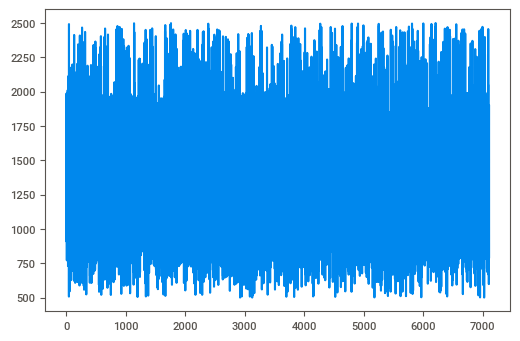

In [34]:
df2['INT_SQFT'].plot()

* used scatter plot to visualise the sqft of the houses in the dataset 

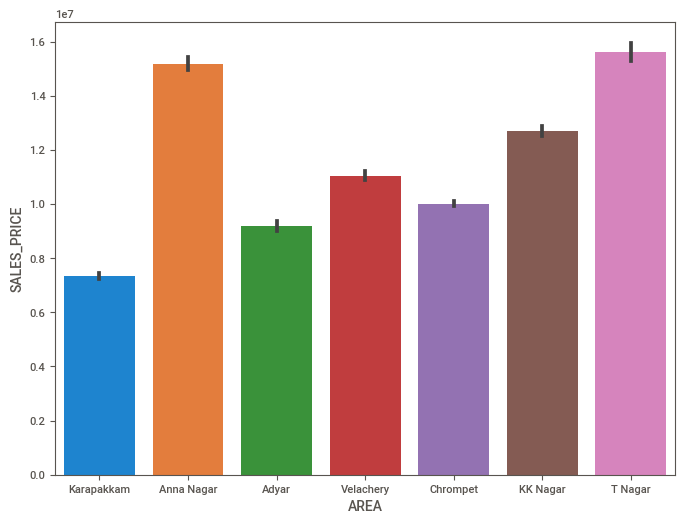

In [35]:
plt.figure(figsize= (8,6))
sns.barplot(x=df2.AREA,y=df2.SALES_PRICE)

* used barplot to visualize sales_price and Area

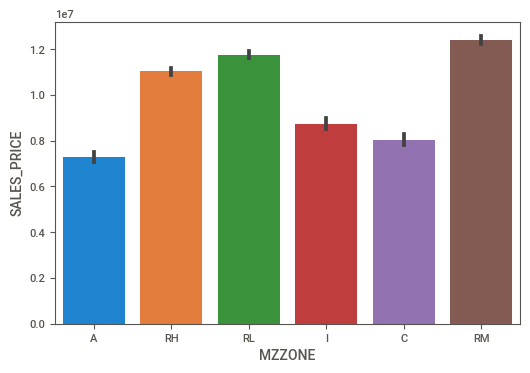

In [36]:
sns.barplot(x=df2.MZZONE,y=df2.SALES_PRICE)

* used barplot to visualize sales_price and MZZONE

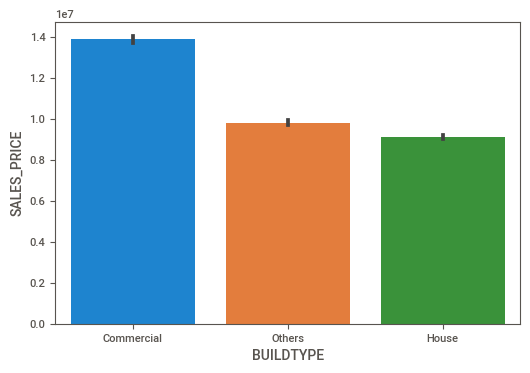

In [37]:
sns.barplot(x=df2.BUILDTYPE,y=df2.SALES_PRICE)

* used barplot to visualize sales_price and BUILDTYPE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


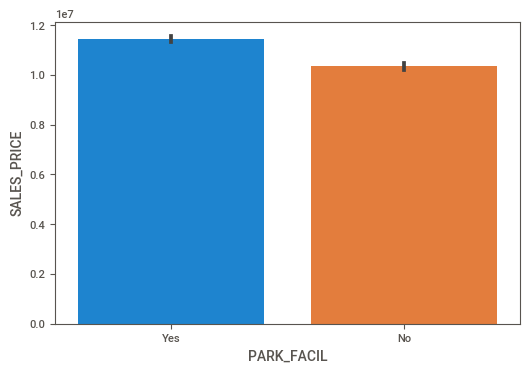

In [38]:
sns.barplot(df2.PARK_FACIL,df2.SALES_PRICE)

* used barplot to visualize sales_price and PARKING_FACILITY

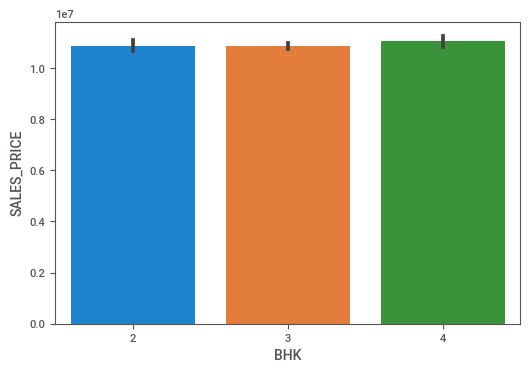

In [39]:
sns.barplot(x=df2.BHK,y=df2.SALES_PRICE)

* used barplot to visualize sales_price and BHK

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


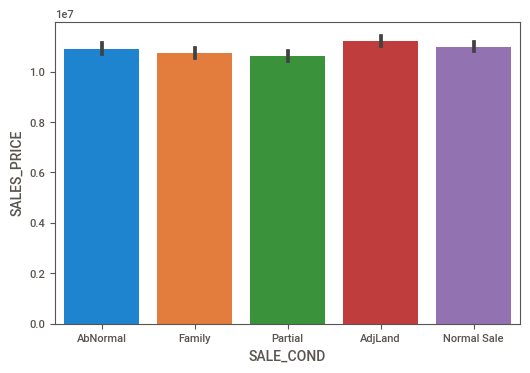

In [40]:
sns.barplot(df2.SALE_COND,df2.SALES_PRICE)

* used barplot to visualize sales_price and SALES_CONDITION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


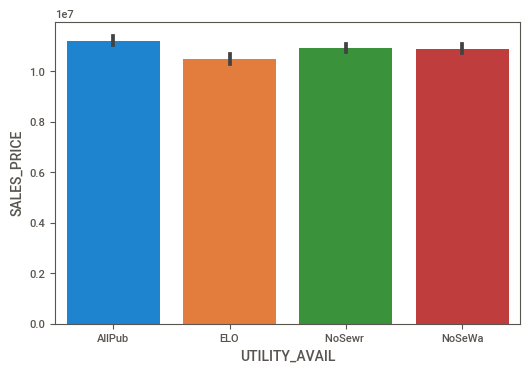

In [41]:
sns.barplot(df2.UTILITY_AVAIL,df2.SALES_PRICE)

* used barplot to visualize sales_price and UTILITY_AVAILABLE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


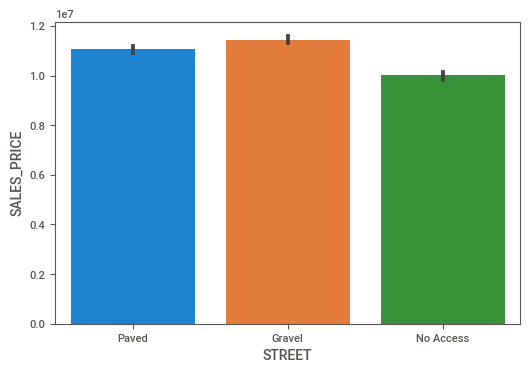

In [42]:
sns.barplot(df2.STREET,df2.SALES_PRICE)

* used barplot to visualize sales_price and STREET

## Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [44]:
df2["AREA"] = label_encoder.fit_transform(df2["AREA"])
df2["SALE_COND"] = label_encoder.fit_transform(df2["SALE_COND"])
df2["PARK_FACIL"] = label_encoder.fit_transform(df2["PARK_FACIL"])
df2["BUILDTYPE"] = label_encoder.fit_transform(df2["BUILDTYPE"])
df2["UTILITY_AVAIL"] = label_encoder.fit_transform(df2["UTILITY_AVAIL"])
df2["STREET"] = label_encoder.fit_transform(df2["STREET"])
df2["MZZONE"] = label_encoder.fit_transform(df2["MZZONE"])

* we transformed some data into a Numerical/Machine-readable form using lableEncoder function

In [45]:
df2.corr()

,AREA,INT_SQFT,DIST_MAINROAD,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,SALES_PRICE,HOUSE_AGE,BHK
AREA,1.000000,0.351331,-0.015105,-0.007565,0.010383,-0.009517,0.007268,0.014482,-0.154106,0.006299,0.002450,0.007486,-0.019138,0.180388,0.005116
INT_SQFT,0.351331,1.000000,0.002022,0.006969,0.004618,-0.006329,0.022839,0.008341,0.143226,0.016146,-0.011463,0.005847,0.612125,-0.013171,0.006736
DIST_MAINROAD,-0.015105,0.002022,1.000000,0.004367,-0.009448,-0.014235,0.006893,0.011087,0.007334,0.013050,-0.021857,0.002757,0.018783,-0.003493,-0.013407
SALE_COND,-0.007565,0.006969,0.004367,1.000000,-0.012948,-0.010065,0.010887,0.012191,0.023552,0.011830,-0.009298,-0.004171,-0.030732,-0.008473,-0.011197
PARK_FACIL,0.010383,0.004618,-0.009448,-0.012948,1.000000,-0.006436,-0.004610,0.007567,-0.007192,-0.012234,-0.011484,-0.002365,0.146428,-0.009456,0.001554
BUILDTYPE,-0.009517,-0.006329,-0.014235,-0.010065,-0.006436,1.000000,0.009981,-0.010680,-0.016594,-0.000304,0.013384,0.003509,-0.436276,0.003785,0.005158
UTILITY_AVAIL,0.007268,0.022839,0.006893,0.010887,-0.004610,0.009981,1.000000,0.012612,0.015688,0.006215,0.010926,0.010437,-0.015913,-0.004853,0.001445
STREET,0.014482,0.008341,0.011087,0.012191,0.007567,-0.010680,0.012612,1.000000,-0.002052,0.015438,0.007095,-0.016388,-0.042652,0.004271,-0.001170
MZZONE,-0.154106,0.143226,0.007334,0.023552,-0.007192,-0.016594,0.015688,-0.002052,1.000000,0.002644,-0.018049,0.005534,0.427789,-0.111261,-0.009327
QS_ROOMS,0.006299,0.016146,0.013050,0.011830,-0.012234,-0.000304,0.006215,0.015438,0.002644,1.000000,0.001796,0.009590,0.016059,0.016728,0.430916


* so we can see that the datas are been converted into a Numerical form of data and it is ready for the validation 

In [46]:
df2.corr()["SALES_PRICE"].sort_values(ascending = False)

SALES_PRICE      1.000000
INT_SQFT         0.612125
MZZONE           0.427789
PARK_FACIL       0.146428
DIST_MAINROAD    0.018783
QS_ROOMS         0.016059
QS_BEDROOM       0.015044
BHK              0.014023
UTILITY_AVAIL   -0.015913
AREA            -0.019138
QS_BATHROOM     -0.019469
SALE_COND       -0.030732
STREET          -0.042652
HOUSE_AGE       -0.119509
BUILDTYPE       -0.436276
Name: SALES_PRICE, dtype: float64

* we sorted the data in ascenting order using sort_values(ascending=F) function

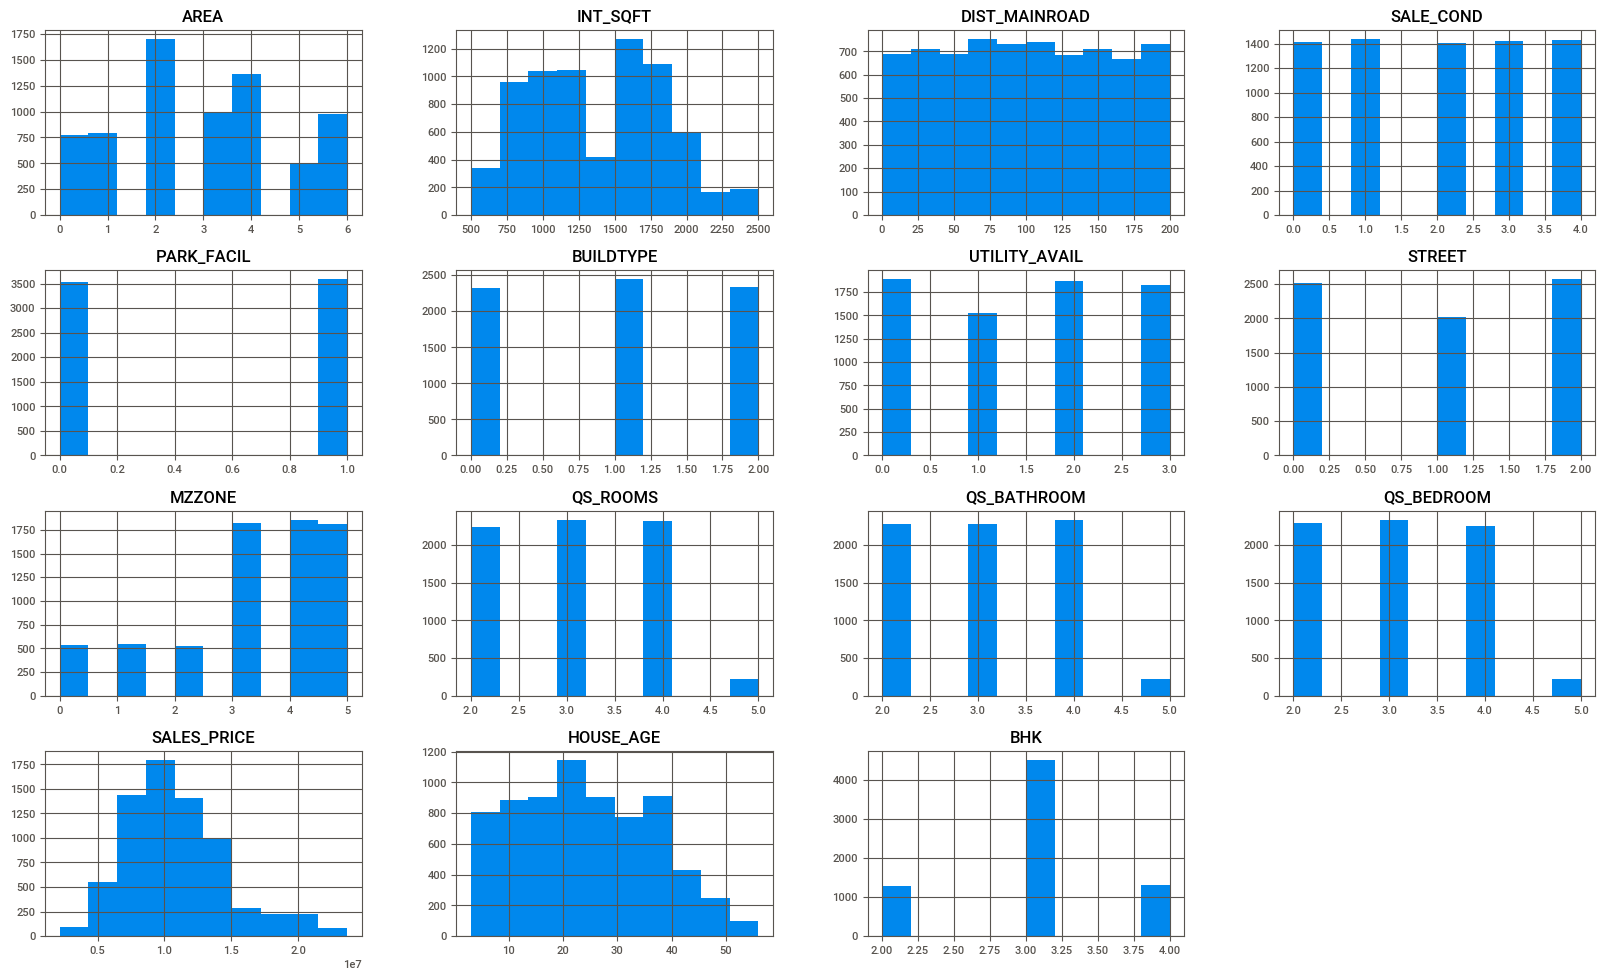

In [47]:
df2.hist(bins=10,figsize=(20,12))
plt.show()

* We created the Histogram plot for all the data present in the dataset to know about the graphical form of the datasets

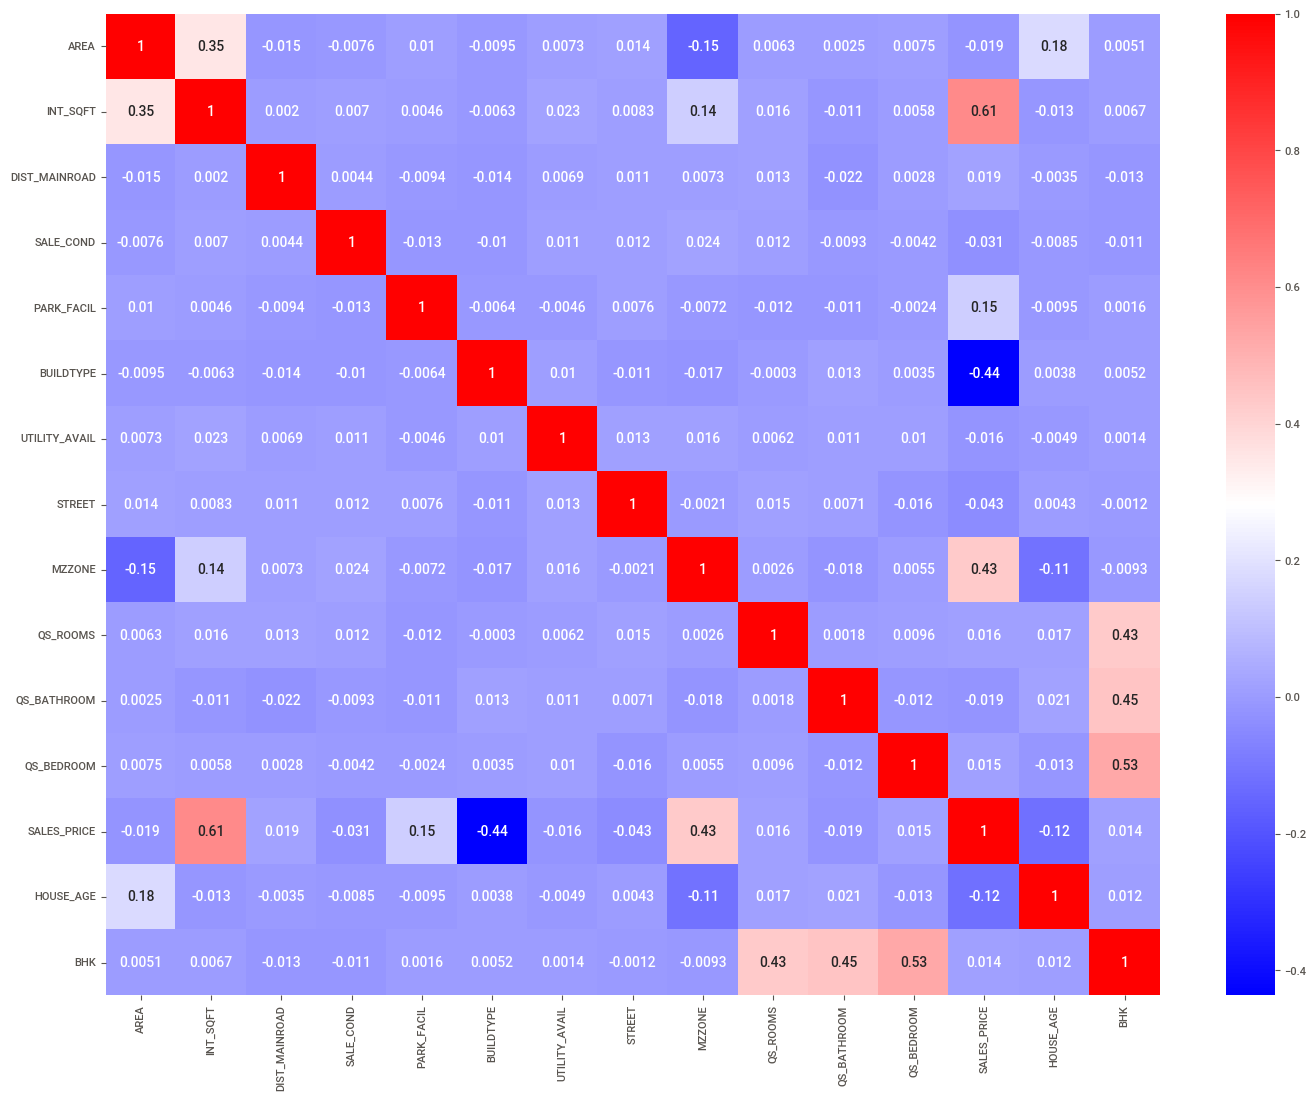

In [48]:
plt.figure(figsize=(17,13))
sns.heatmap(df2.corr(),cmap='bwr' ,annot=True)

* we created a headmap for all the data presented on the dataset

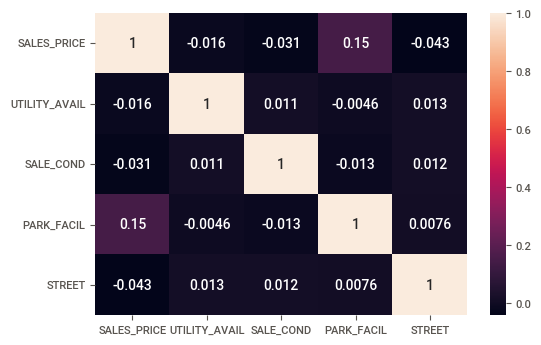

In [49]:
sns.heatmap(df2[["SALES_PRICE", "UTILITY_AVAIL", "SALE_COND", "PARK_FACIL", "STREET"]].corr(), annot=True);

* we created a heatmap for sales_price, utility_available, sales_condition, parking_facilty and street

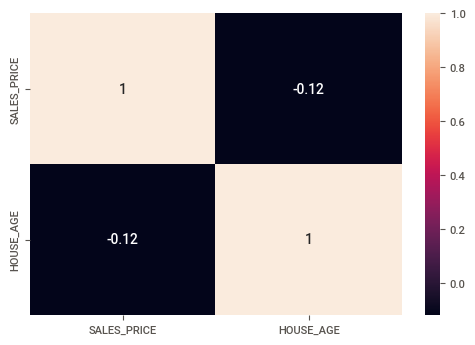

In [50]:
sns.heatmap(df2[["SALES_PRICE", "HOUSE_AGE"]].corr(), annot=True);

* we created heatmap for sales_price and house_age

In [51]:
df3 = df2.copy()
df3.head()

,AREA,INT_SQFT,DIST_MAINROAD,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,SALES_PRICE,HOUSE_AGE,BHK
0,4,1004,131,0,1,0,0,2,0,4,3,4,7600000,44.0,4
1,1,1986,26,0,0,0,0,0,3,4,4,2,21717770,11.0,3
2,0,909,70,0,1,0,1,0,4,4,3,2,13159200,20.0,3
3,6,1855,14,2,0,2,3,2,2,4,3,3,9630290,22.0,4
4,4,1226,84,0,1,2,0,0,1,3,2,4,7406250,30.0,3


In [52]:
df3['SALES_PRICE'].describe().T

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

* we described the count, mean, standard deviation, min, max of the sales_price using describe() function

In [53]:
df3.SALES_PRICE.value_counts()

5378000     2
9429000     2
4971250     2
4546625     2
11930880    2
           ..
6928000     1
14874950    1
9304770     1
6980320     1
9976480     1
Name: SALES_PRICE, Length: 7057, dtype: int64

In [54]:
df3.describe()

,AREA,INT_SQFT,DIST_MAINROAD,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,SALES_PRICE,HOUSE_AGE,BHK
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000,7109.000000
mean,2.959347,1382.073006,99.603179,2.003939,0.504572,1.000985,1.512308,1.007315,3.317344,3.075538,3.069349,3.056126,1.089491e+07,24.286538,3.004923
std,1.837797,457.410902,57.403110,1.415302,0.500014,0.810125,1.138185,0.846358,1.498831,0.872937,0.876024,0.871499,3.768603e+06,12.342829,0.604898
min,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000,2.000000
25%,2.000000,993.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,2.000000,8.272100e+06,14.000000,3.000000
50%,3.000000,1373.000000,99.000000,2.000000,1.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,3.000000,1.033505e+07,23.000000,3.000000
75%,4.000000,1744.000000,148.000000,3.000000,1.000000,2.000000,3.000000,2.000000,5.000000,4.000000,4.000000,4.000000,1.299390e+07,34.000000,3.000000
max,6.000000,2500.000000,200.000000,4.000000,1.000000,2.000000,3.000000,2.000000,5.000000,5.000000,5.000000,5.000000,2.366734e+07,56.000000,4.000000


* we described the count, mean, standard deviation, min, max of the dataset using describe() function

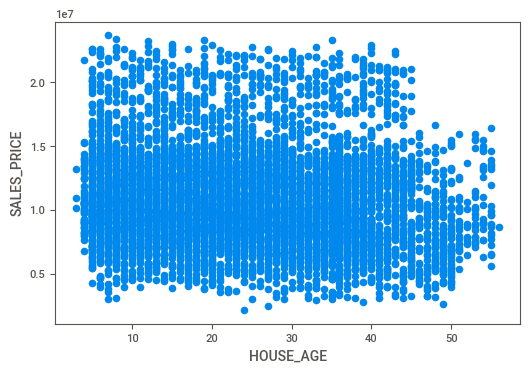

In [55]:
import plotly.express as px
df3.plot.scatter(x='HOUSE_AGE', y='SALES_PRICE')

* we plotted a scatter plot for the house_age and sales_price

In [56]:
df3.groupby('HOUSE_AGE')['SALES_PRICE'].mean()

HOUSE_AGE
3.0     1.142293e+07
4.0     1.093210e+07
5.0     1.134105e+07
6.0     1.161884e+07
7.0     1.127769e+07
8.0     1.116946e+07
9.0     1.128225e+07
10.0    1.149426e+07
11.0    1.153234e+07
12.0    1.123810e+07
13.0    1.103813e+07
14.0    1.147625e+07
15.0    1.146508e+07
16.0    1.149787e+07
17.0    1.086510e+07
18.0    1.133964e+07
19.0    1.125704e+07
20.0    1.067254e+07
21.0    1.116761e+07
22.0    1.136297e+07
23.0    1.081155e+07
24.0    1.124435e+07
25.0    1.089145e+07
26.0    1.094506e+07
27.0    1.090997e+07
28.0    1.084162e+07
29.0    1.105236e+07
30.0    1.072406e+07
31.0    1.062968e+07
32.0    1.022121e+07
33.0    1.074603e+07
34.0    1.022972e+07
35.0    1.071783e+07
36.0    1.048599e+07
37.0    1.037997e+07
38.0    1.013738e+07
39.0    1.063477e+07
40.0    1.065277e+07
41.0    1.043039e+07
42.0    1.152310e+07
43.0    1.140136e+07
44.0    1.057647e+07
45.0    1.030587e+07
46.0    9.130826e+06
47.0    8.016700e+06
48.0    8.721339e+06
49.0    7.859473e+06
50.

* we grouped the mean of the house_age and sales_price using groupby.mean() fuction

In [57]:
Numericals = [feature for feature in df3.columns if df3[feature].dtype!='O' and feature !='SALES_PRICE']
print('Number of Numerical independent Features : {}'.format(len(Numericals)))

Number of Numerical independent Features : 14


In [58]:
df3[Numericals].head()

,AREA,INT_SQFT,DIST_MAINROAD,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,HOUSE_AGE,BHK
0,4,1004,131,0,1,0,0,2,0,4,3,4,44.0,4
1,1,1986,26,0,0,0,0,0,3,4,4,2,11.0,3
2,0,909,70,0,1,0,1,0,4,4,3,2,20.0,3
3,6,1855,14,2,0,2,3,2,2,4,3,3,22.0,4
4,4,1226,84,0,1,2,0,0,1,3,2,4,30.0,3


* we described the columns of the idependent numerical features and there is 14 columns are presented in the dataset 

## Data Splitting

In [59]:
X = df3[['AREA','INT_SQFT','DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','BHK','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE','HOUSE_AGE']]
y = df3['SALES_PRICE']
from sklearn.model_selection import train_test_split

* we splited the independent variable as X and traget variable as y 

In [60]:
print(X)
print(y)

      AREA  INT_SQFT  DIST_MAINROAD  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  BHK  \
0        4      1004            131         4            3           4    4   
1        1      1986             26         4            4           2    3   
2        0       909             70         4            3           2    3   
3        6      1855             14         4            3           3    4   
4        4      1226             84         3            2           4    3   
...    ...       ...            ...       ...          ...         ...  ...   
7104     4       598             51         3            2           2    2   
7105     6      1897             52         3            4           3    3   
7106     6      1614            152         4            4           2    3   
7107     4       787             40         4            3           4    4   
7108     6      1896            156         3            3           4    3   

      SALE_COND  PARK_FACIL  BUILDTYPE  UTILITY_AVA

* And now we can see the numerical features of X and y

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 101)

* we splitted the data into X_train, X_test and y_train, y_test using train_test_split() function
* And we splitted the data X_train as 70% and X_test as 30% for the validation

In [62]:
X_train

,AREA,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,BHK,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE
1161,1,1658,110,4,3,3,3,4,0,1,2,1,3,44.0
5318,2,1231,48,4,2,2,2,4,1,0,0,2,3,6.0
3219,2,832,98,3,4,3,4,0,1,1,1,2,4,17.0
6756,0,1089,18,3,4,2,3,1,1,1,2,1,1,27.0
130,1,1880,90,3,4,4,3,4,1,1,2,1,5,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2,1227,151,3,3,4,3,4,1,1,3,2,5,6.0
5695,5,1815,23,3,2,3,2,0,1,0,2,2,4,11.0
1361,0,936,106,2,2,3,3,3,1,2,1,2,3,24.0
1547,6,1851,100,4,3,4,4,4,0,2,1,2,5,16.0


* we can see the 70% of the data 4976rows x 14 columns from 7109rows x 14 columns

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(7109, 14) (4976, 14) (2133, 14)


* And here we can see the datas splitted using .shape() function

In [64]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

* As we see that we imported the standard scaler and the X_test and the X_train has been scaled using the standard scaler

## Model Selection and evaluation

### Linear Regression

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

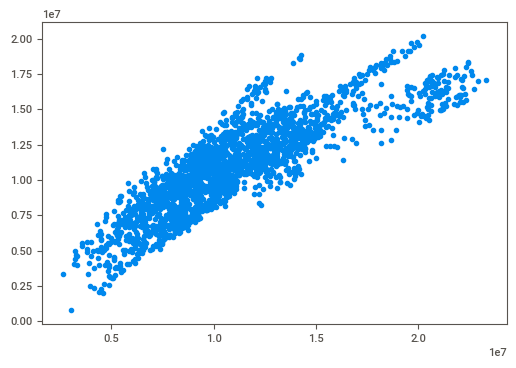

In [66]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)

* we had made a feature named prediction for X_test and plotted a scatter plot for y_test and prediction 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


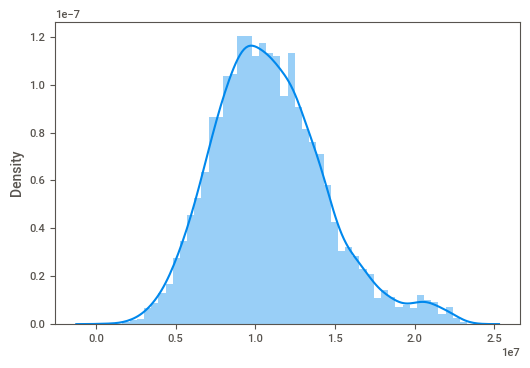

In [67]:
sns.distplot((y_test, pred),bins=50)

* we plotted a distplot for y_test and prediction to see the model is well shaped

In [68]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print_evaluate(y_test, test_pred)
print_evaluate(y_train, train_pred)

MAE: 1541583.3974096593
MSE: 3880909301811.3916
RMSE: 1970002.360864421
R2 Square 0.736645232596667
__________________________________
MAE: 1516863.1580880748
MSE: 3673051927284.9453
RMSE: 1916520.7870735307
R2 Square 0.7370691885993597
__________________________________


In [69]:
results = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.541583e+06,3.880909e+12,1.970002e+06,0.736645,0.73448


### Export location and column information to a file that will be useful later on in our prediction application

In [70]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))